### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

## 1. 기본 그래프(basic plot)

막대(bar), 선(line), 산포도(산점도, scatter plot), 히스토그램, 상자(box)

### (1) 질적 데이터

+ 요약방법 : 도표
+ 정리방법 : 도수 분포표, 분할표
+ 그래프 : 막대, 원, ...


### (2) 양적 데이터

+ 요약방법 : 수치
+ 정리방법 : 산술평균, 중앙값, ..
+ 그래프 : 히스토그램, 선(시계열 데이터), 산포도, Boxplot, ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

## 2. 선 그래프 - 연속변수

0     0.334436
10    0.770667
20   -0.208299
30    2.692606
40   -0.947558
50   -0.262491
60    1.760669
70    1.234431
80   -0.029354
90   -1.129733
dtype: float64


<AxesSubplot:>

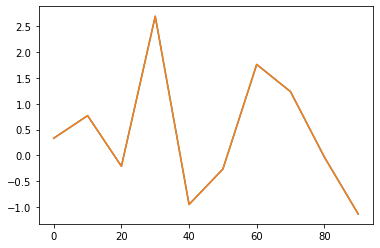

In [7]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
print(s)

s.plot()
s.plot.line()

<AxesSubplot:>

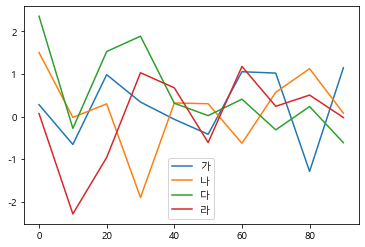

In [15]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df.plot()

## 3. 막대 그래프

<AxesSubplot:>

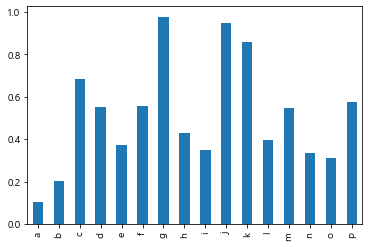

In [20]:
s = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s

s.plot(kind="bar")
s.plot.bar()

<AxesSubplot:>

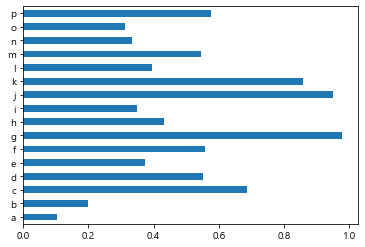

In [23]:
# 가로로 보기
s.plot(kind="barh")
s.plot.barh()

<AxesSubplot:>

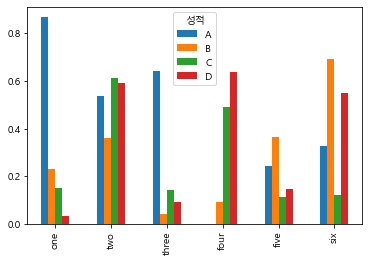

In [29]:
df = pd.DataFrame(np.random.rand(6,4), index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="성적"))
df.plot(kind="bar")

<AxesSubplot:>

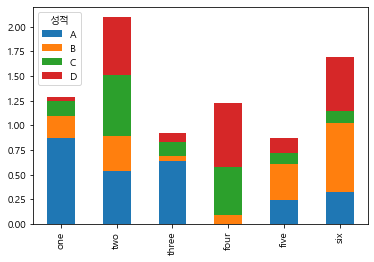

In [32]:
df.plot(kind="bar", stacked=True)

<AxesSubplot:>

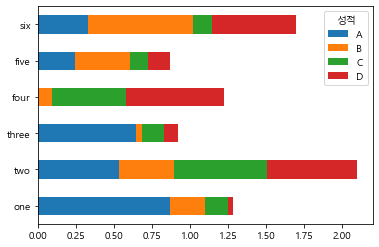

In [33]:
df.plot(kind="barh", stacked=True)

## 4. histogram

+ 값만 필요하고 인덱스는 필요없다.
+ 숫자 형태의 데이터값을 범주형 변수로 활용할 때 사용

<AxesSubplot:>

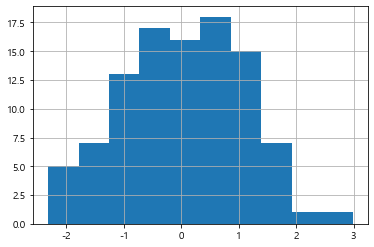

In [36]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

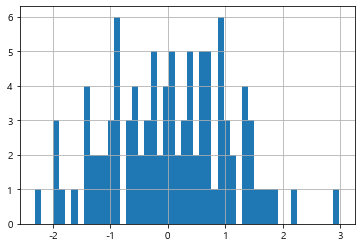

In [37]:
# bins 는 가로 x축 칸 수.  즉, 막대 수

s.hist(bins=50)

## 5. 산점도(산포도, scatter plot)

+ 두 변수의 관계를 확인

<AxesSubplot:xlabel='x1', ylabel='x2'>

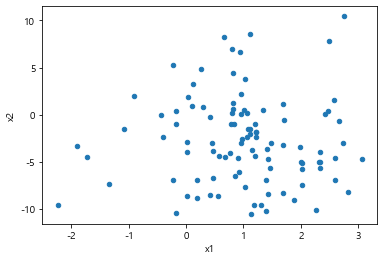

In [43]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

# 입력값이 2개라고 가정
x = np.concatenate((x1, x2), axis=1)
x[:5]

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1", "x2")

## 상자 그래프(box plot)

+ five-number summary
    - 최소값, 최대값, 1사분위, 2사분위, 3사분위

<AxesSubplot:>

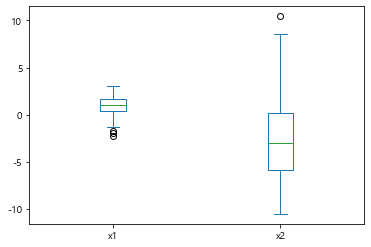

In [44]:
df.plot.box()

## 7. 활용 예제

+ tips 샘플

In [48]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

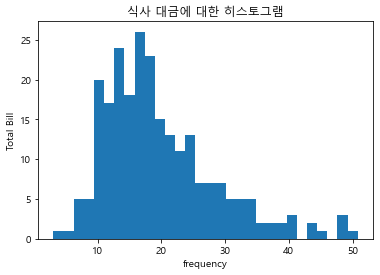

In [63]:
##### total_bill 에 대한 금액에 대해서 분포 확인

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)     #1행 1열에 1개를 그리겠다는 의미 = 기본값, 생략가능

ax.hist(tips["total_bill"], bins=30)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

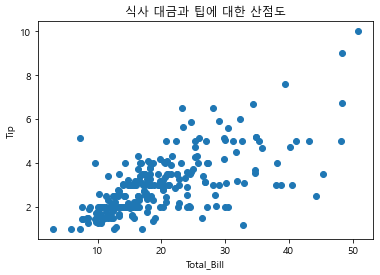

In [67]:
##### total_bill 과 tip의 관계를 알고 싶다.  -> 두 변수의 관계는 산포도라는 점 !

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips.tip)
ax.set_title("식사 대금과 팁에 대한 산점도")
ax.set_xlabel("Total_Bill")
ax.set_ylabel("Tip")

{'whiskers': [<matplotlib.lines.Line2D at 0x2779f10d460>,
 'caps': [<matplotlib.lines.Line2D at 0x2779f10da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2779f10d190>,
 'medians': [<matplotlib.lines.Line2D at 0x2779f10dfa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2779ea002b0>,
 'means': []}

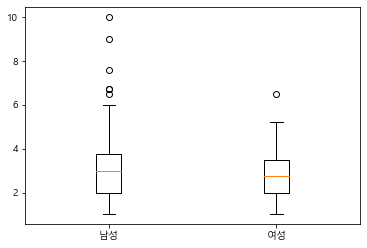

In [70]:
##### 성별과 팁의 상관관계 - 여기서 성별이 남, 여로 나뉘므로 팁과 2개의 변수라고 볼 수 없다. Box 그래프를 사용

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Male"]["tip"] ,
            tips[tips["sex"]=="Female"]["tip"]], labels=["남성", "여성"])

# 결과를 보면 남성이 편차가 크고 기본적으로 주는 금액은 남성, 여성 비슷하다. (남성이 이상치가 많다. - 그래프상 o 모양)

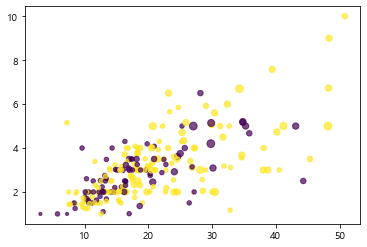

In [74]:
##### 성별에 인원수에 따른 total_bill 과 tip의 관계를 알고 싶다.

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head(10)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7, s=tips["size"]*10)    
# c는 색상(물론 랜덤), alpha는 투명도 지정, s는 사이즈 - 점의 크기가 커지고 작고

## 8. 활용 예제2

+ 전국 신규 민간아파트 분양 가격 동향
+ https://data.go.kr

### (1) Data Definition

In [42]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


## (2) Data Preprocessing

In [43]:
##### Column 의 이름을 영어로 변경(city, size, year, month, price)
apt1 = apt[:]    #깊은 복사,  apt 의 전체데이터 [:] 를 apt1 에 복사
apt1.columns = ["city", "size", "year", "month", "price"]
apt1.head()

,city,size,year,month,price
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [44]:
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [45]:
##### price는 숫자로 데이터 타입 변경

apt1["price"] = pd.to_numeric(apt1["price"].str.strip())
#apt1.astype({'price':'int64'})

In [46]:
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


### (3) Visualization 시각화

In [47]:
##### 서울과 전체 사이즈만 조회

apt1_seoul = apt1[(apt1["city"]=="서울") & (apt1["size"]=="전체")]

# query 함수는 indexing 보다 속도는 떨어진다.
# apt1.query('(city=="서울") and (size=="전체")')

In [48]:
apt1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    54 non-null     object 
 1   size    54 non-null     object 
 2   year    54 non-null     int64  
 3   month   54 non-null     int64  
 4   price   54 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ KB


In [34]:
##### city, size 컬럼 삭제하고 year와 month는 다중 인덱스로

# 삭제하지 않고 pivot_table 로 year와 month를 가져와서 만드는 방법
# apt1_seoul1 = apt1_seoul.pivot_table(index=['year','month'], values='price')
# apt1_seoul1.plot()


In [49]:
# 컬럼삭제는 drop
apt1_seoul1 = apt1_seoul.drop(['city','size'], axis=1)

apt1_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [51]:
apt1_seoul1 = apt1_seoul1.set_index(["year", "month"])

<AxesSubplot:xlabel='year,month'>

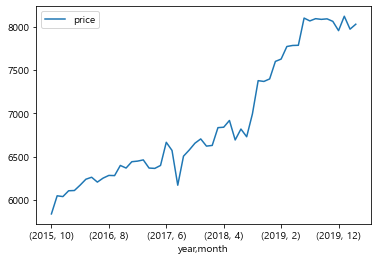

In [52]:
apt1_seoul1.plot()

## 9. seaborn

In [53]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'Total Bill')

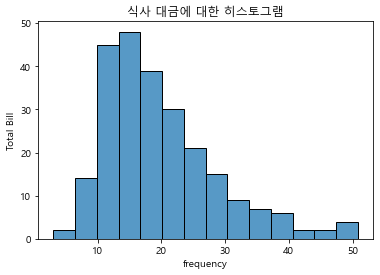

In [57]:
##### total_bill 에 대한 금액 분포 확인

# sns.distplot(tips["total_bill"])
ax = sns.histplot(tips["total_bill"])
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

C:\Users\alcls\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

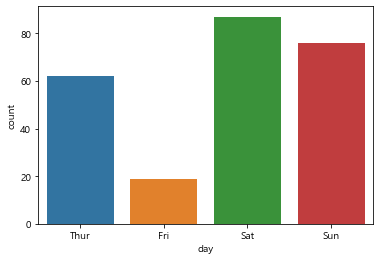

In [59]:
##### 요일별로 인원수 파악

# countplot 은 막대그래프인데 빈도수를 나타낼 때 사용

sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

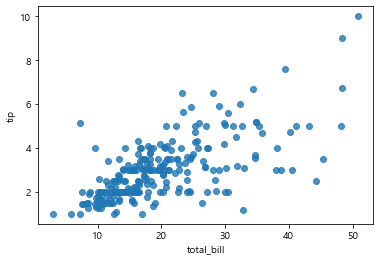

In [61]:
##### total_bill 과 tip의 관계를 알고 싶다. 

# seaborn 에서는 산포도를 regplot 이라는 함수로 사용하며 x값과 y값을 지정하여 사용
# 그래프 안의 선을 빼고 싶다면 fit_reg=False로 지정하면 된다.

sns.regplot(x="total_bill" , y="tip", data=tips, fit_reg=False )

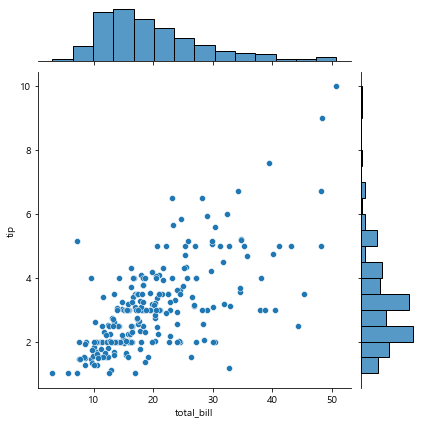

In [62]:
# 히스토그램과 산포도를 합친 표는 jointplot 

sns.jointplot(x="total_bill" , y="tip", data=tips)

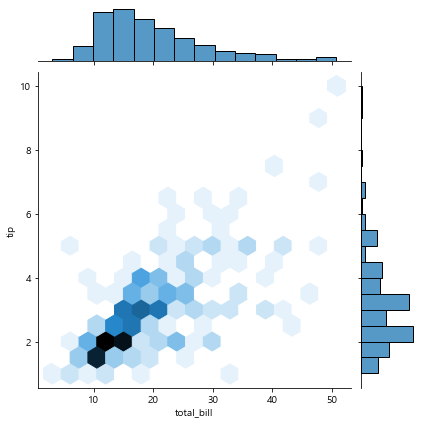

In [63]:
# kind="hex" 옵션을 통해 산포도를 육각형으로 표현가능

sns.jointplot(x="total_bill" , y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

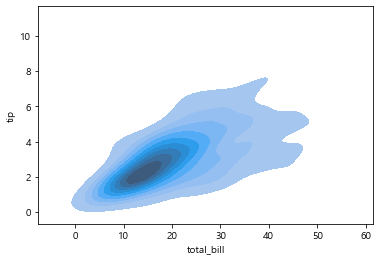

In [65]:
# kdeplot 은 모양을 등고선으로 표현 하며 shade=True 옵션을 지정하면 선안에 색상을 채워서 명암으로 분포도를 알아볼 수 있게끔 지원

sns.kdeplot(x="total_bill" , y="tip", data=tips, shade=True)

In [ ]:
##### 시간에 따른 식사대금

<AxesSubplot:xlabel='time', ylabel='total_bill'>

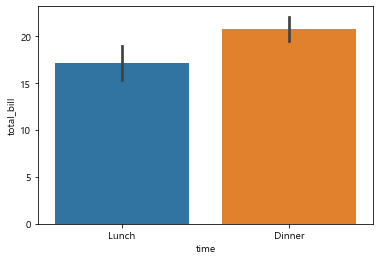

In [66]:
sns.barplot(x="time" , y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

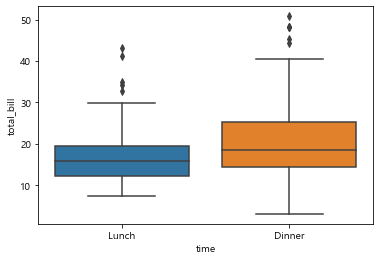

In [67]:
sns.boxplot(x="time" , y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

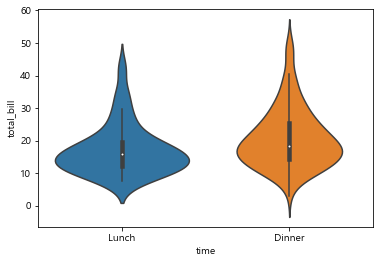

In [68]:
sns.violinplot(x="time" , y="total_bill", data=tips)

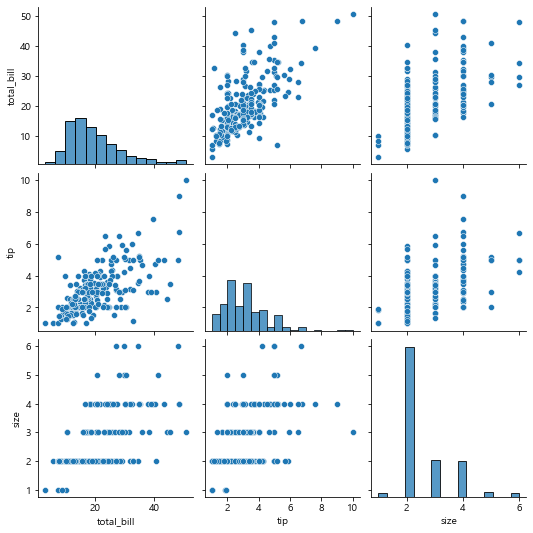

In [69]:
sns.pairplot(tips)

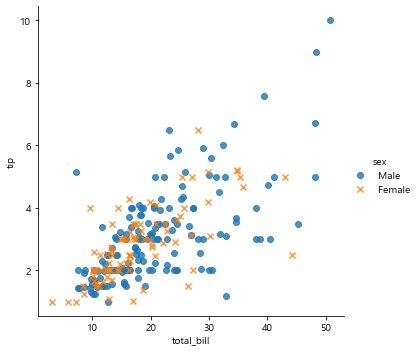

In [75]:
##### 성별에 인원수에 따른 total_bill 과 tip의 관계를 알고 싶다.

# hue 라는 옵션은 색깔로 데이터를 구별할 수 있게끔 도와준다. 여기선 성별을 구분하고자 지정
# markers 라는 옵션은 산포도의 모형을 지정할 수 있도록 도와준다. 여기선 o 와 x로 표현

sns.lmplot(x="total_bill" , y="tip", data=tips, fit_reg=False, hue="sex", markers=["o", "x"])

## 10. 활용 예제 3

+ 타이타닉
    - http://www.kaggle.com/c/titanic

## (1) Data Prepare

In [93]:
train = pd.read_csv("data/train.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (2) EDA (Explorer Data Analysis)

In [86]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True)

In [85]:
train[train["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

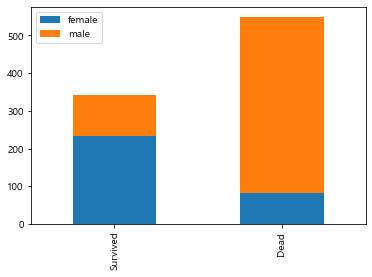

In [87]:
bar_chart("Sex")

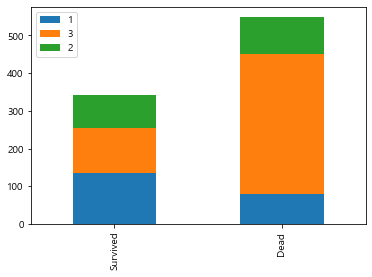

In [88]:
bar_chart("Pclass")

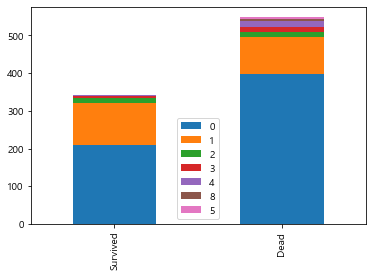

In [89]:
bar_chart("SibSp")

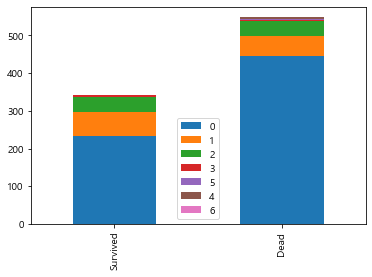

In [90]:
bar_chart("Parch")

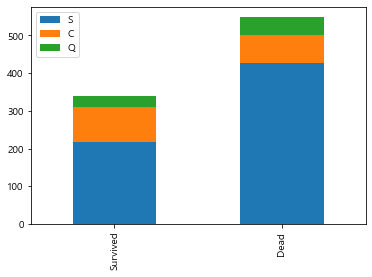

In [91]:
bar_chart("Embarked")

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
##### Name에서 호칭 부분 추출하기

# 위에 info()를 통해 확인하면 Name의 속성이 Object 이므로 .str을 붙여 문자열로 변경하고 extract 를 통해 추출한다.

train["title"] = train["Name"].str.extract(" ([a-zA-Z]+)\.")
train["title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

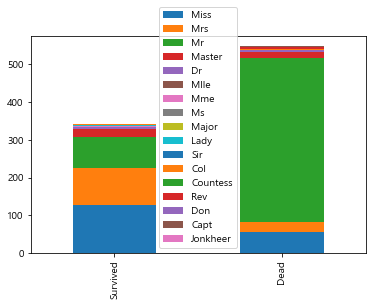

In [108]:
bar_chart("title")

In [110]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Johkheer":3, "Countess":3,
                "Capt":3, "Ms":3}
train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0.0    517
1.0    182
2.0    125
3.0     66
Name: title, dtype: int64

In [118]:
#fillna 는 결측치를 채워주는 함수,   transform 은 전부 한번씩 대입하는 함수

train["Age"].fillna(train.groupby("title")["Age"].transform("mean"), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        890 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
